## To-Do
- Train Data
    - Need to replace rows with 3+ in dependents column
    - Need to decide how to clean the null values for all columns
- Test Data
    - Need to replace rows with 3+ in dependents column
    - Need to decide how to clean the null values for all columns


- Create powerpoint slides
    - Not more than 3-4 slides
    - Raw Data -> Data Cleaning / Manipulation (1 slide?)
    - Data Exploration  (1 slide?)
    - ML Model / Constraints (1 slide?)
    - Insights and Conclusion (1 slide?)

##### Possible Hypotheses
1. Applicants with high incomes should have more chances of loan approval.
2. Applicants who have repaid their previous debts should have higher chances of loan approval.
3. Loan approval should also depend on the loan amount. If the loan amount is less, the chances of loan 
4. approval should be high.
5. Lesser the amount to be paid monthly to repay the loan, the higher the chances of loan approval.

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("train.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df_test = pd.read_csv("test.csv")
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


#### Things to take note:
1. Loan status is not present in the data_test as such, test csv would be used for prediction of unseen data
2. Conversion to dummy variables would be needed for gender, married, dependents, education, self_employed, loan_status, property area
 

# Data Exploration and Preprocessing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


#### Hypotheses

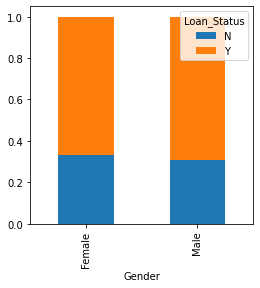

In [ ]:
Gender=pd.crosstab(df['Gender'],df['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

# It can be inferred that the proportion of male and female applicants is more or less the same for both approved and unapproved loans.


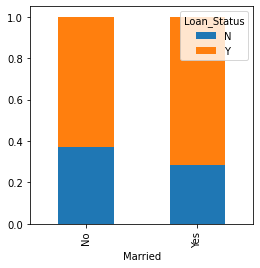

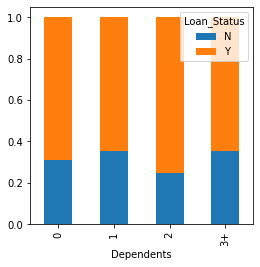

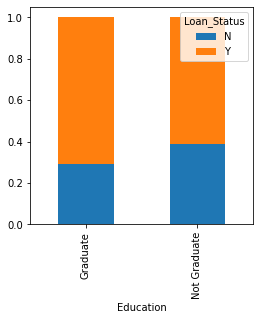

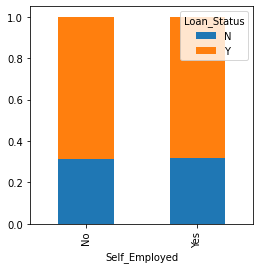

In [ ]:
Married=pd.crosstab(df['Married'],df['Loan_Status'])
Dependents=pd.crosstab(df['Dependents'],df['Loan_Status'])
Education=pd.crosstab(df['Education'],df['Loan_Status'])
Self_Employed=pd.crosstab(df['Self_Employed'],df['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()
Education.div(Education.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

- The proportion of married applicants is higher for approved loans.
- Distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status.
- There is nothing significant we can infer from Self_Employed vs Loan_Status plot.

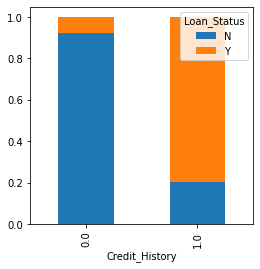

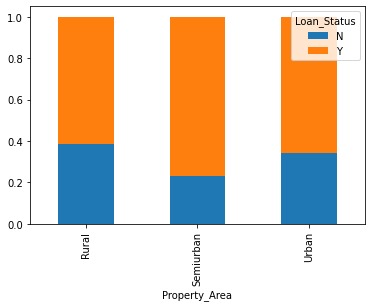

In [ ]:
Credit_History=pd.crosstab(df['Credit_History'],df['Loan_Status'])
Property_Area=pd.crosstab(df['Property_Area'],df['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.show()

- It seems people with a credit history as 1 are more likely to get their loans approved.
- The proportion of loans getting approved in the semi-urban area is higher as compared to that in rural or urban areas.

<AxesSubplot:xlabel='Loan_Status', ylabel='ApplicantIncome'>

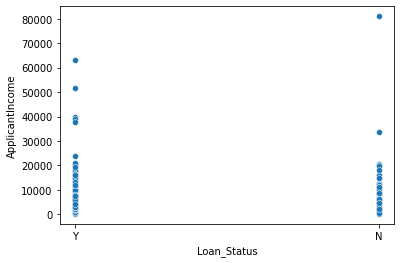

In [ ]:
sns.scatterplot(data=df, x="Loan_Status", y="ApplicantIncome")

<AxesSubplot:xlabel='Loan_Status', ylabel='CoapplicantIncome'>

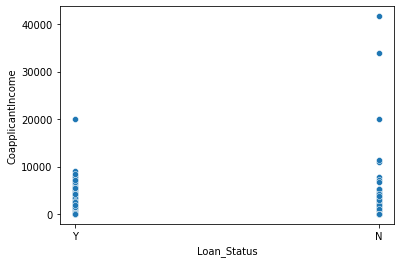

In [ ]:
sns.scatterplot(data=df, x="Loan_Status", y="CoapplicantIncome")

- It can be inferred that Applicant's income does not affect the chances of loan approval which contradicts our hypothesis in which we assumed that if the applicant's income is high the chances of loan approval will also be high.

The percentage of Y class : 0.6872964169381107
The percentage of N class : 0.3127035830618892
/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


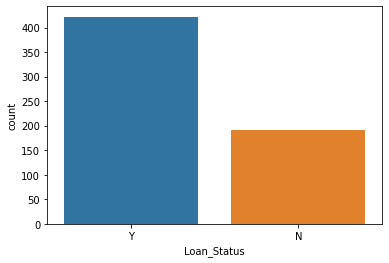

In [ ]:
sns.countplot(df['Loan_Status'])

print(f"The percentage of Y class : {df['Loan_Status'].value_counts()[0] / len(df)}")
print(f"The percentage of N class : {df['Loan_Status'].value_counts()[1] / len(df)}")

In [ ]:
 # Change Loan status from Y & N to 1 & 0
df['Loan_Status'] = df['Loan_Status'].replace({'N': 0, 'Y': 1})

In [ ]:
df['Loan_Status'].unique()

array([1, 0])

In [ ]:
df.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.677552
Loan_Amount_Term    -2.362414
Credit_History      -1.882361
Loan_Status         -0.809998
dtype: float64

<ipython-input-15-e476cab0f61e>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df.hist(ax = ax)


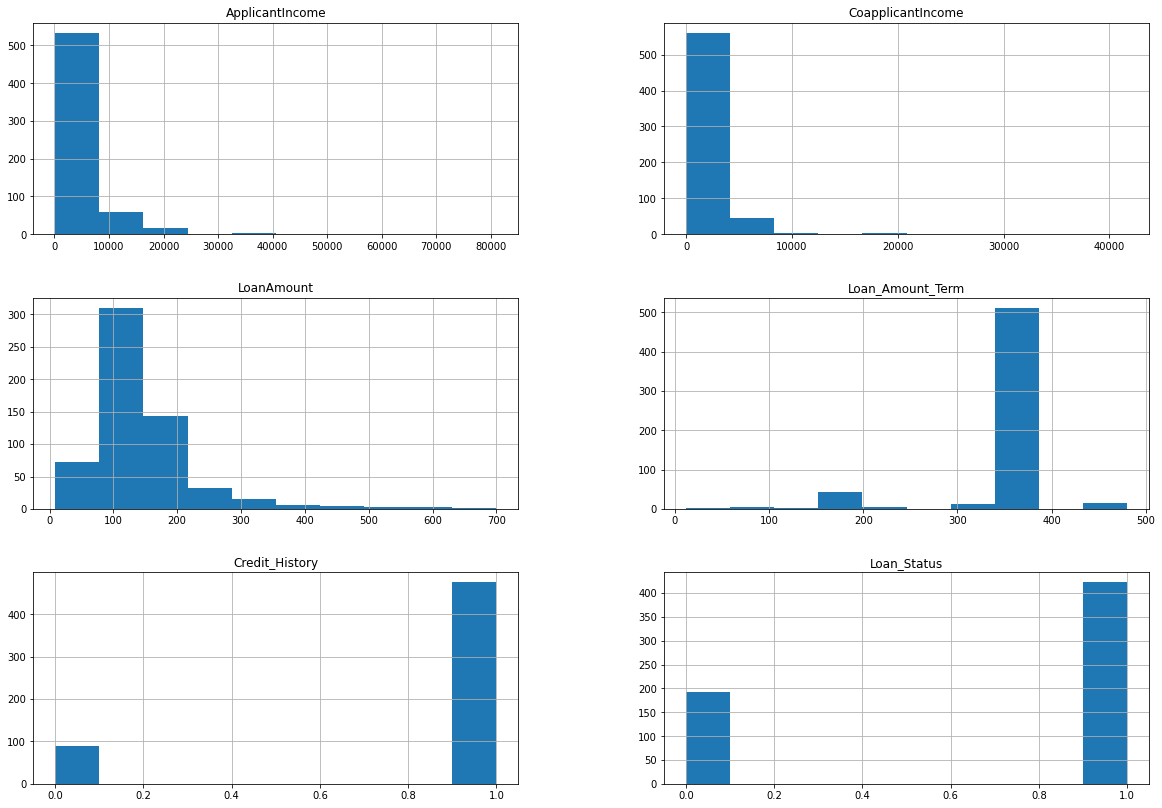

In [ ]:
fig = plt.figure(figsize = (20,14))
ax = fig.gca()
df.hist(ax = ax)

plt.show()

# we can see that most of the data are skewed. but it may be a good thing to help easily identify the label class

In [ ]:
# Describe the numerical data

df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
count,614.000000,614.000000,592.000000,600.00000,564.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199,0.687296
std,6109.041673,2926.248369,85.587325,65.12041,0.364878,0.463973
min,150.000000,0.000000,9.000000,12.00000,0.000000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000,0.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000,1.000000


In [ ]:
df.duplicated().any()

# we got no duplicated rows

False

In [ ]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn

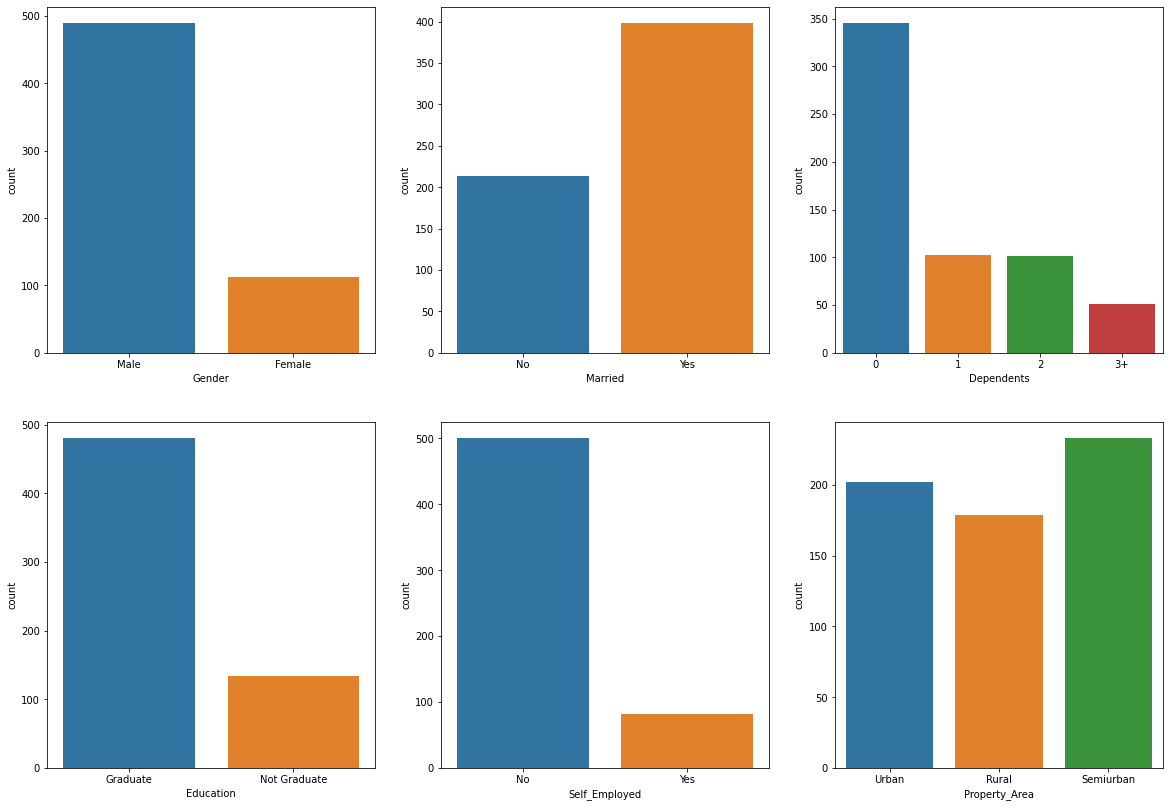

In [ ]:
categorical = ['Gender','Married','Dependents','Education','Self_Employed', 'Property_Area']

fig, ax = plt.subplots(2,3, figsize=(20, 14))

index = 0
for i in range(0,2):
    for j in range(0,3):
        sns.countplot(df[categorical[index]], ax=ax[i, j])
        index += 1


plt.show()

In [ ]:
df_ = df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']]

/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or mi

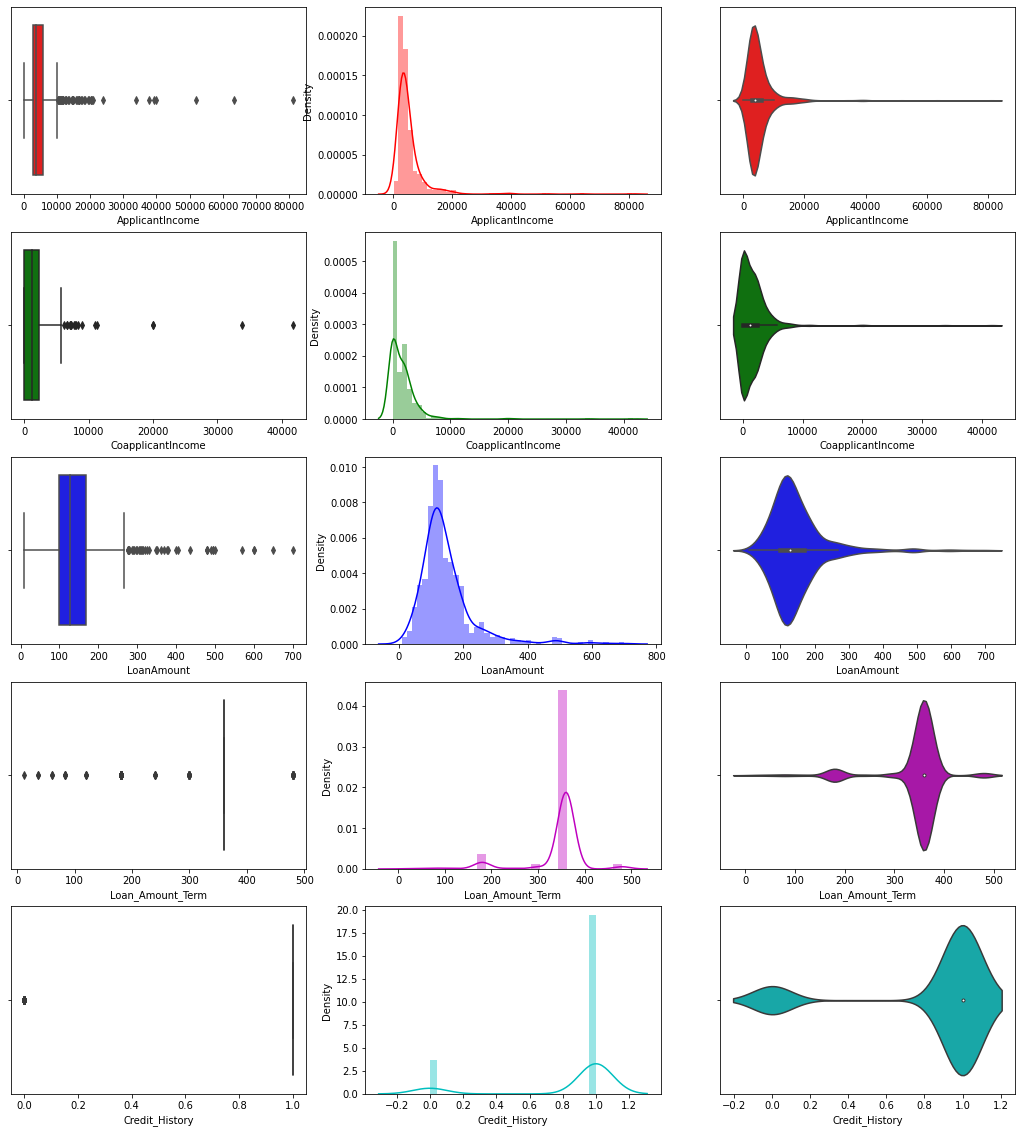

In [ ]:
# Draw the distributions of all variables
f, axes = plt.subplots(5, 3, figsize=(18, 20))
colors = ["r", "g", "b", "m", "c"]  # m for magenta, c for cyan

count = 0
# Start of for loop
for var in df_:
    sns.boxplot(df_[var], orient = "h", color = colors[count], ax = axes[count,0])
    sns.distplot(df_[var], color = colors[count], ax = axes[count,1])
    sns.violinplot(df_[var], color = colors[count], ax = axes[count,2])
    count += 1 # same as count = count + 1


plt.show()

####  Variables that will help us predict whether or not a person will be approved for a loan

In [ ]:
# Most correlated values are: 1) Credit_History 2) Property_Area_Semiurban 3) Property_Area_Rural

corr_df = df.corr()
corr_df.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status'],
      dtype='object')

In [ ]:
# for _ ,column in enumerate(df.columns):
#     sns.displot(df[column])

In [ ]:
df.isnull().sum()

#columns with missing cells

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
data_train = df.copy()

In [ ]:
# Categorical values 

# train dataset 
data_train['Gender'].fillna(data_train['Gender'].mode()[0], inplace=True)
data_train['Married'].fillna(data_train['Married'].mode()[0], inplace=True)
data_train['Dependents'].fillna(data_train['Dependents'].mode()[0], inplace=True)
data_train['Self_Employed'].fillna(data_train['Self_Employed'].mode()[0], inplace=True)

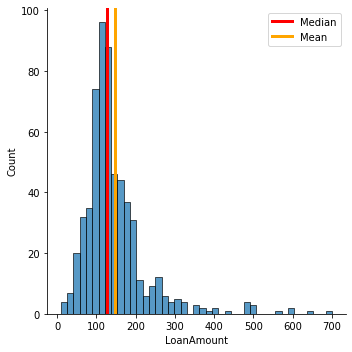

In [ ]:
# Example of numerical value histogram why we choose the median instead of the mean
sns.displot(data_train['LoanAmount'])
plt.axvline(x=data_train['LoanAmount'].median(),
            color='red',linewidth=3, label='Median')
plt.axvline(x=data_train['LoanAmount'].mean(),
            color='orange',linewidth=3, label='Mean')
plt.legend()

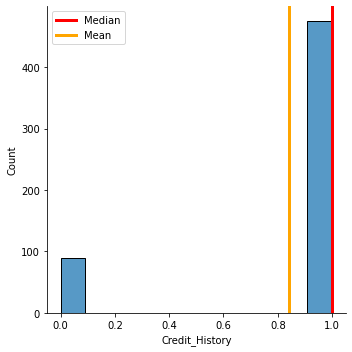

In [ ]:
# Example of numerical value histogram why we choose the median instead of the mean
sns.displot(data_train['Credit_History'])
plt.axvline(x=data_train['Credit_History'].median(),
            color='red',linewidth=3, label='Median')
plt.axvline(x=data_train['Credit_History'].mean(),
            color='orange',linewidth=3, label='Mean')
plt.legend()

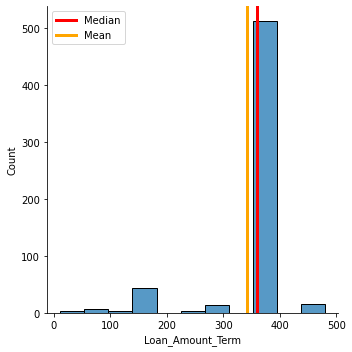

In [ ]:
sns.displot(data_train['Loan_Amount_Term'])
plt.axvline(x=data_train['Loan_Amount_Term'].median(),
            color='red',linewidth=3, label='Median')
plt.axvline(x=data_train['Loan_Amount_Term'].mean(),
            color='orange',linewidth=3, label='Mean')
plt.legend()

In [ ]:
# Numberical values 

data_train['Credit_History'].fillna(data_train['Credit_History'].mode()[0], inplace=True)
data_train['Loan_Amount_Term'].fillna(data_train['Loan_Amount_Term'].mode()[0], inplace=True)
data_train['LoanAmount'].fillna(data_train['LoanAmount'].median(), inplace=True)

In [ ]:
data_train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
dummies = pd.get_dummies(data_train[['Gender','Married','Education','Self_Employed','Property_Area','Dependents']])
data_train = pd.concat([dummies, data_train.drop(['Gender','Married','Education','Self_Employed',\
                        'Dependents','Property_Area',], axis=1)], axis=1)
data_train = data_train.drop('Loan_ID', axis = 1)

<AxesSubplot:>

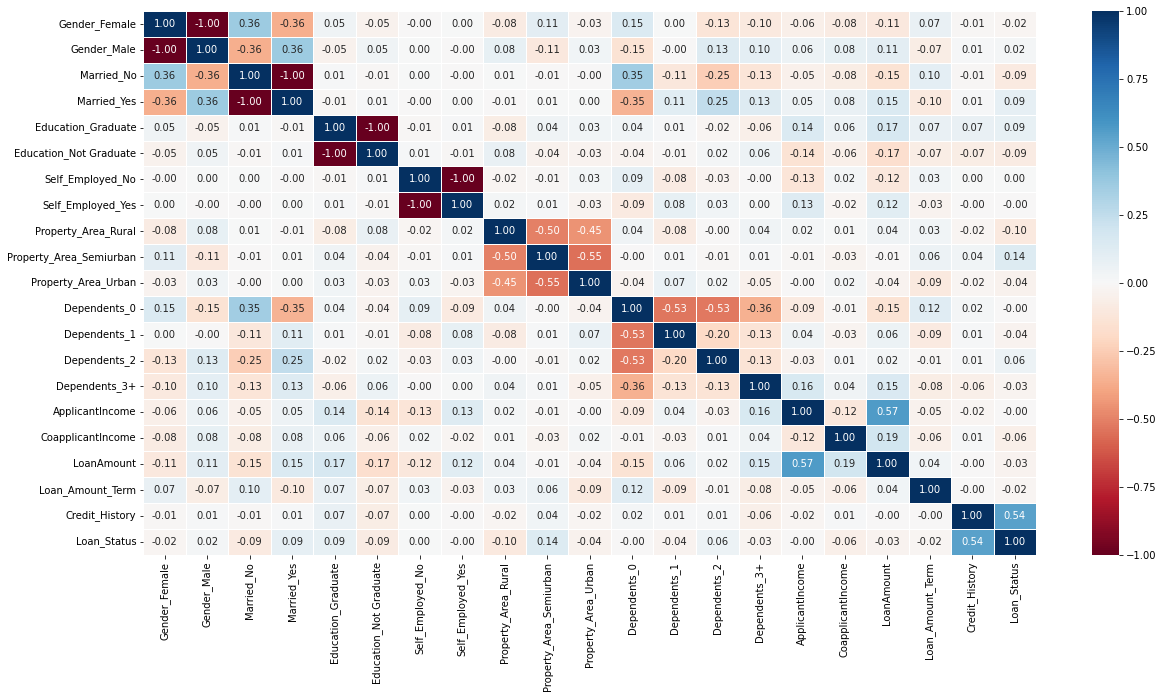

In [ ]:
f, axes = plt.subplots(1, 1, figsize=(20, 10))
sns.heatmap(data_train.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 10}, cmap = "RdBu")

In [ ]:
# Most correlated values are: 1) Credit_History 2) Property_Area_Semiurban 3) Property_Area_Rural
corr_train = data_train.corr()
corr_train['Loan_Status'].sort_values(ascending=False)

Loan_Status                1.000000
Credit_History             0.540556
Property_Area_Semiurban    0.136540
Married_Yes                0.091478
Education_Graduate         0.085884
Dependents_2               0.062384
Gender_Male                0.017987
Self_Employed_No           0.003700
Dependents_0              -0.003044
Self_Employed_Yes         -0.003700
ApplicantIncome           -0.004710
Gender_Female             -0.017987
Loan_Amount_Term          -0.022549
Dependents_3+             -0.026123
LoanAmount                -0.033214
Dependents_1              -0.038740
Property_Area_Urban       -0.043621
CoapplicantIncome         -0.059187
Education_Not Graduate    -0.085884
Married_No                -0.091478
Property_Area_Rural       -0.100694
Name: Loan_Status, dtype: float64

### Applying to Test Data

In [ ]:
data_test = df_test.copy()

In [ ]:
# (TEST SET) Filling missing rows with most appropriate value (median or mode)
data_test['Gender'].fillna(data_test['Gender'].mode()[0], inplace=True)
data_test['Dependents'].fillna(data_test['Dependents'].mode()[0], inplace=True)
data_test['Self_Employed'].fillna(data_test['Self_Employed'].mode()[0], inplace=True)
data_test['LoanAmount'].fillna(data_test['LoanAmount'].median(), inplace=True)
data_test['Loan_Amount_Term'].fillna(data_test['Loan_Amount_Term'].mode()[0], inplace=True)
data_test['Credit_History'].fillna(data_test['Credit_History'].mode()[0], inplace=True)

In [ ]:
dummies = pd.get_dummies(data_test[['Gender','Married','Education','Self_Employed','Property_Area','Dependents']])
data_test = pd.concat([dummies, data_test.drop(['Gender','Married','Education','Self_Employed',\
                        'Dependents','Property_Area',], axis=1)], axis=1)

data_test = data_test.drop('Loan_ID', axis = 1)

data_test

,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0,1,0,1,1,0,1,0,0,0,1,1,0,0,0,5720,0,110.0,360.0,1.0
1,0,1,0,1,1,0,1,0,0,0,1,0,1,0,0,3076,1500,126.0,360.0,1.0
2,0,1,0,1,1,0,1,0,0,0,1,0,0,1,0,5000,1800,208.0,360.0,1.0
3,0,1,0,1,1,0,1,0,0,0,1,0,0,1,0,2340,2546,100.0,360.0,1.0
4,0,1,1,0,0,1,1,0,0,0,1,1,0,0,0,3276,0,78.0,360.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,0,1,0,1,0,1,0,1,0,0,1,0,0,0,1,4009,1777,113.0,360.0,1.0
363,0,1,0,1,1,0,1,0,0,0,1,1,0,0,0,4158,709,115.0,360.0,1.0
364,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,3250,1993,126.0,360.0,1.0
365,0,1,0,1,1,0,1,0,1,0,0,1,0,0,0,5000,2393,158.0,360.0,1.0


## Deciding significant Variables

In [ ]:
df_var = data_train.copy()
df_var.columns

Index(['Gender_Female', 'Gender_Male', 'Married_No', 'Married_Yes',
       'Education_Graduate', 'Education_Not Graduate', 'Self_Employed_No',
       'Self_Employed_Yes', 'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban', 'Dependents_0', 'Dependents_1', 'Dependents_2',
       'Dependents_3+', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status'],
      dtype='object')

In [ ]:
X = data_train.drop('Loan_Status' , axis = 1)
y = data_train['Loan_Status']

In [ ]:
import statsmodels.api as sm

regressor_OLS = sm.OLS(endog=y, exog=X).fit()
regressor_OLS.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Loan_Status   R-squared:                       0.328
Model:                            OLS   Adj. R-squared:                  0.312
Method:                 Least Squares   F-statistic:                     20.87
Date:                Wed, 03 Aug 2022   Prob (F-statistic):           3.00e-43
Time:                        10:02:46   Log-Likelihood:                -277.28
No. Observations:                 614   AIC:                             584.6
Df Residuals:                     599   BIC:                             650.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Gender_Female               0.0315      0.031      1.015      0.311      -0.029       0.093
Gender_Male                 0.0298      0.027      1.095      0.274      -0.024       0.083
Married_No                 -0.0151      0.028     -0.547      0.585      -0.070       0.039
Married_Yes                 0.0765      0.026      2.940      0.003       0.025       0.128
Education_Graduate          0.0609      0.028      2.184      0.029       0.006       0.116
Education_Not Graduate      0.0005      0.027      0.018      0.986      -0.052       0.053
Self_Employed_No            0.0298      0.028      1.078      0.282      -0.024       0.084
Self_Employed_Yes           0.0316      0.033      0.971      0.332      -0.032       0.095
Property_Area_Rural        -0.0361      0.027     -1.333      0.183      -0.089       0.017
Property_Area_Semiurban     0.0946      0.025      3.729      0.000       0.045       0.144
Property_Area_Urban         0.0028      0.025      0.112      0.911      -0.046       0.052
Dependents_0                0.0248      0.027      0.902      0.367      -0.029       0.079
Dependents_1               -0.0456      0.035     -1.317      0.188      -0.114       0.022
Dependents_2                0.0591      0.036      1.649      0.100      -0.011       0.129
Dependents_3+               0.0231      0.046      0.505      0.614      -0.067       0.113
ApplicantIncome          1.136e-06   3.26e-06      0.348      0.728   -5.28e-06    7.55e-06
CoapplicantIncome       -1.042e-05   5.69e-06     -1.832      0.067   -2.16e-05     7.5e-07
LoanAmount                 -0.0003      0.000     -1.037      0.300      -0.001       0.000
Loan_Amount_Term           -0.0002      0.000     -0.733      0.464      -0.001       0.000
Credit_History              0.7012      0.044     15.806      0.000       0.614       0.788
==============================================================================
Omnibus:                       93.825   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              135.469
Skew:                          -1.131   Prob(JB):                     3.83e-30
Kurtosis:                       3.421   Cond. No.                     7.70e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.97e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Having decided a significance level of 0.05:
A few factors has been deemed significant enough to affect the loan status:
1. The proportion of population that got married.
2. Whether the person applying for loan has an education.
3. Whether they live in semi urban area.
4. The credit history of the person appliying for loan.

In [ ]:
X = data_train.drop('Loan_Status' , axis = 1)
y = data_train['Loan_Status']

In [ ]:
test = X[['Married_Yes','Education_Graduate','Property_Area_Semiurban','Credit_History']]
test.head()

,Married_Yes,Education_Graduate,Property_Area_Semiurban,Credit_History
0,0,1,0,1.0
1,1,1,0,1.0
2,1,1,0,1.0
3,1,0,0,1.0
4,0,1,0,1.0


In [ ]:
data_test_opt = data_test[['Married_Yes','Education_Graduate','Property_Area_Semiurban','Credit_History']]

# Machine Learning Model

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(test,y, test_size=0.3)

Models to try
- Logistic Regression
- Support Vector Machines
- Naive Bayes
- Nearest Neighbor
- Decision Trees

### Logistic Regression

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression


lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)

LogisticRegression()

LogisticRegression()

In [ ]:
pred_cv = lr_model.predict(x_cv)
print(f"Accuracy Score : {accuracy_score(y_cv,pred_cv)}")
print(f"F1 Score: {f1_score(y_cv,pred_cv)}")

Accuracy Score : 0.8054054054054054
F1 Score: 0.8741258741258742


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix_lr = confusion_matrix(y_cv, pred_cv)


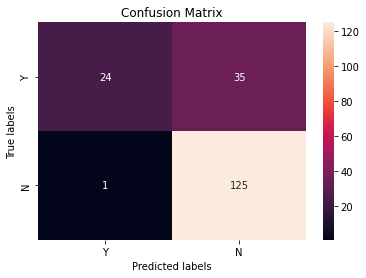

In [ ]:
ax= plt.subplot()
sns.heatmap(confusion_matrix_lr, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Y', 'N']); ax.yaxis.set_ticklabels(['Y', 'N']);

In [ ]:
# pred_test = model.predict(data_test)
pred_test = lr_model.predict(data_test_opt)
data_test_logistic_regression = data_test.copy()
data_test_logistic_regression['Loan_Status'] = pred_test
data_test_logistic_regression['Loan_Status'] = data_test_logistic_regression['Loan_Status'].replace({0: 'N', 1 : 'Y'})
data_test_logistic_regression.head() 

,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,...,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,0,1,0,1,1,0,1,0,0,0,...,1,0,0,0,5720,0,110.0,360.0,1.0,Y
1,0,1,0,1,1,0,1,0,0,0,...,0,1,0,0,3076,1500,126.0,360.0,1.0,Y
2,0,1,0,1,1,0,1,0,0,0,...,0,0,1,0,5000,1800,208.0,360.0,1.0,Y
3,0,1,0,1,1,0,1,0,0,0,...,0,0,1,0,2340,2546,100.0,360.0,1.0,Y
4,0,1,1,0,0,1,1,0,0,0,...,1,0,0,0,3276,0,78.0,360.0,1.0,Y


In [ ]:
# i=1
# mean = 0
# kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
# for train_index,test_index in kf.split(X,y):
#  print (‘\n{} of kfold {} ‘.format(i,kf.n_splits))
#  xtr,xvl = X.loc[train_index],X.loc[test_index]
#  ytr,yvl = y[train_index],y[test_index]
#  model = LogisticRegression(random_state=1)
#  model.fit(xtr,ytr)
#  pred_test=model.predict(xvl)
#  score=accuracy_score(yvl,pred_test)
#  mean += score
#  print (‘accuracy_score’,score)
#  i+=1
#  pred_test = model.predict(test)
#  pred = model.predict_proba(xvl)[:,1]
 
# print (‘\n Mean Validation Accuracy’,mean/(i-1))

# submission['Loan_Status']=pred_test
# submission['Loan_ID']=test_original['Loan_ID']
# submission['Loan_Status'].replace(0, 'N', inplace=True)
# submission['Loan_Status'].replace(1, 'Y', inplace=True)
# pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('Output/Log2.csv')

### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Instantiate and fit the RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
# Make predictions for the test set
pred_rfc = forest.predict(x_cv)
print(f"Accuracy Score : {accuracy_score(y_cv,pred_rfc)}")
print(f"F1 Score: {f1_score(y_cv,pred_rfc)}")

Accuracy Score : 0.8054054054054054
F1 Score: 0.8741258741258742


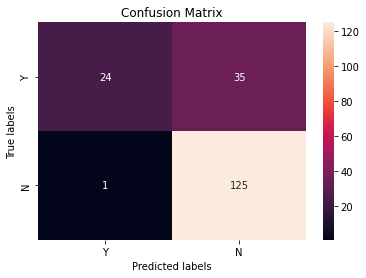

In [ ]:
confusion_matrix_rf = confusion_matrix(y_cv, pred_rfc)

ax= plt.subplot()
sns.heatmap(confusion_matrix_rf, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Y', 'N']); ax.yaxis.set_ticklabels(['Y', 'N']);


In [ ]:
# pred_test_rf = forest.predict(data_test)
pred_test_rf = forest.predict(data_test_opt)
data_test_random_forest = data_test.copy()
data_test_random_forest['Loan_Status'] = pred_test_rf
data_test_random_forest['Loan_Status'] = data_test_random_forest['Loan_Status'].replace({0: 'N', 1 : 'Y'})
data_test_random_forest.head() 

,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,...,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,0,1,0,1,1,0,1,0,0,0,...,1,0,0,0,5720,0,110.0,360.0,1.0,Y
1,0,1,0,1,1,0,1,0,0,0,...,0,1,0,0,3076,1500,126.0,360.0,1.0,Y
2,0,1,0,1,1,0,1,0,0,0,...,0,0,1,0,5000,1800,208.0,360.0,1.0,Y
3,0,1,0,1,1,0,1,0,0,0,...,0,0,1,0,2340,2546,100.0,360.0,1.0,Y
4,0,1,1,0,0,1,1,0,0,0,...,1,0,0,0,3276,0,78.0,360.0,1.0,Y


### Support Vector Machine

In [ ]:
from sklearn import svm

In [ ]:
# creating an SVM Classifier
clf = svm.SVC(kernel='linear')
clf.fit(x_train, y_train)

SVC(kernel='linear')

In [ ]:
# Make predictions for the test set
pred_svm = clf.predict(x_cv)
print(f"Accuracy Score : {accuracy_score(y_cv,pred_svm)}")
print(f"F1 Score: {f1_score(y_cv,pred_svm)}")

Accuracy Score : 0.8054054054054054
F1 Score: 0.8741258741258742


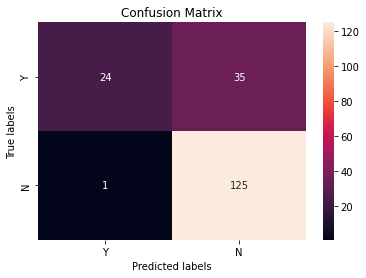

In [ ]:
confusion_matrix_svm = confusion_matrix(y_cv, pred_svm)

ax= plt.subplot()
sns.heatmap(confusion_matrix_rf, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Y', 'N']); ax.yaxis.set_ticklabels(['Y', 'N']);

In [ ]:

pred_test_svm = clf.predict(data_test_opt)
data_test_svm = data_test.copy()
data_test_svm['Loan_Status'] = pred_test_svm
data_test_svm['Loan_Status'] = data_test_svm['Loan_Status'].replace({0: 'N', 1 : 'Y'})
data_test_svm.head() 

,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,...,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,0,1,0,1,1,0,1,0,0,0,...,1,0,0,0,5720,0,110.0,360.0,1.0,Y
1,0,1,0,1,1,0,1,0,0,0,...,0,1,0,0,3076,1500,126.0,360.0,1.0,Y
2,0,1,0,1,1,0,1,0,0,0,...,0,0,1,0,5000,1800,208.0,360.0,1.0,Y
3,0,1,0,1,1,0,1,0,0,0,...,0,0,1,0,2340,2546,100.0,360.0,1.0,Y
4,0,1,1,0,0,1,1,0,0,0,...,1,0,0,0,3276,0,78.0,360.0,1.0,Y


### K-Nearest Neighbour

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
# Make predictions for the test set
pred_knn = knn.predict(x_cv)
print(f"Accuracy Score : {accuracy_score(y_cv,pred_knn)}")
print(f"F1 Score: {f1_score(y_cv,pred_knn)}")

Accuracy Score : 0.8054054054054054
F1 Score: 0.8741258741258742


In [ ]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_cv)
    error.append(np.mean(pred_i != y_cv))

Text(0, 0.5, 'Mean Error')

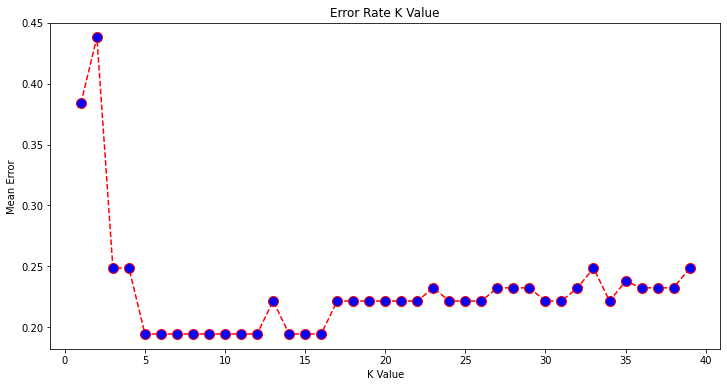

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [ ]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [ ]:
# Make predictions for the test set
pred_knn = knn.predict(x_cv)
print(f"Accuracy Score : {accuracy_score(y_cv,pred_knn)}")
print(f"F1 Score: {f1_score(y_cv,pred_knn)}")

Accuracy Score : 0.8054054054054054
F1 Score: 0.8723404255319148


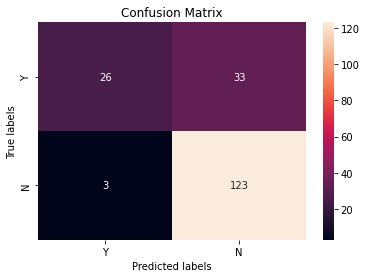

In [ ]:
confusion_matrix_knn = confusion_matrix(y_cv, pred_knn)

ax= plt.subplot()
sns.heatmap(confusion_matrix_knn, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Y', 'N']); ax.yaxis.set_ticklabels(['Y', 'N']);

In [ ]:
# pred_test_knn = knn12.predict(data_test)
pred_test_knn = knn.predict(data_test_opt)

data_test_knn = data_test.copy()
data_test_knn['Loan_Status'] = pred_test_knn
data_test_knn['Loan_Status'] = data_test_knn['Loan_Status'].replace({0: 'N', 1 : 'Y'})
data_test_knn.head()


,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,...,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,0,1,0,1,1,0,1,0,0,0,...,1,0,0,0,5720,0,110.0,360.0,1.0,Y
1,0,1,0,1,1,0,1,0,0,0,...,0,1,0,0,3076,1500,126.0,360.0,1.0,Y
2,0,1,0,1,1,0,1,0,0,0,...,0,0,1,0,5000,1800,208.0,360.0,1.0,Y
3,0,1,0,1,1,0,1,0,0,0,...,0,0,1,0,2340,2546,100.0,360.0,1.0,Y
4,0,1,1,0,0,1,1,0,0,0,...,1,0,0,0,3276,0,78.0,360.0,1.0,N


# Pycaret

In [ ]:
# import pycaret
# from pycaret.classification import *

In [ ]:
# df_caert = df.copy()


In [ ]:
# df_caert.head()

In [ ]:
# classify = setup(data = df_caert, target = 'Loan_Status')

In [ ]:
# compare_models()

In [ ]:
# compare_models(n_select = 3, sort='F1')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ca6491d5-dcd8-4f08-8e98-375cf39044bb' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>